<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

---

### ScalarImage

>      ScalarImage (*args, **kwargs)

Image whose pixel values represent scalars.

See :class:`~torchio.Image` for more information.

## Image Writers

In [1]:
#| echo: false
#| output: asis
show_doc(write_image)

---

### write_image

>      write_image (data, file_path, dimension_order='TCZYX')

*Writes an image to a file.

:param data: Image data (numpy array, tensor, or AICSImage)
:param file_path: Path to save the image
:param format: Format to save the image in (default is png)*

In [ ]:
# Example usage:
numpy_array = np.random.rand(3, 100, 100)
write_image(numpy_array, './data_examples/output_from_numpy.tiff')

tensor = torch.rand(3, 100, 100)
write_image(tensor, './data_examples/output_from_tensor.tiff')

aics_image = AICSImage('./data_examples/example_tiff.tiff')
write_image(aics_image, './data_examples/output_from_tiff.png')

Image successfully saved to ./data_examples/output_from_numpy.tiff
Image successfully saved to ./data_examples/output_from_tensor.tiff
Image successfully saved to ./data_examples/output_from_tiff.png


## Image Readers

In [2]:
#| echo: false
#| output: asis
show_doc(tiff2torch)

---

[source](https://github.com/bmandracchia/bioMONAI/blob/main/bioMONAI/io.py#L20){target="_blank" style="float:right; font-size:smaller"}

### tiff2torch

>      tiff2torch (file_path:str)

*Load tiff into pytorch tensor*

In [3]:
#| echo: false
#| output: asis
show_doc(string2dict)

---

[source](https://github.com/bmandracchia/bioMONAI/blob/main/bioMONAI/io.py#L30){target="_blank" style="float:right; font-size:smaller"}

### string2dict

>      string2dict (input_string:str)

In [4]:
#| echo: false
#| output: asis
show_doc(split_path)

---

[source](https://github.com/bmandracchia/bioMONAI/blob/main/bioMONAI/io.py#L53){target="_blank" style="float:right; font-size:smaller"}

### split_path

>      split_path (file_path,
>                  exts:(<class'fastcore.foundation.L'>,<class'list'>)=['.ome.ti
>                  ff', '.tiff', '.tif', '.png'])

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| file_path |  |  | The path to the file to split |
| exts | (<class 'fastcore.foundation.L'>, <class 'list'>) | ['.ome.tiff', '.tiff', '.tif', '.png'] | List of filename extensions |

In [5]:
#| echo: false
#| output: asis
show_doc(aics_image_reader)

---

[source](https://github.com/bmandracchia/bioMONAI/blob/main/bioMONAI/io.py#L68){target="_blank" style="float:right; font-size:smaller"}

### aics_image_reader

>      aics_image_reader (ind_dict=None)

*Initialize self.  See help(type(self)) for accurate signature.*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| ind_dict | NoneType | None | Dictionary indicating the channels to load |

In [ ]:
file_path = 'data_examples/example_tiff.tiff'
test_img, _ = aics_image_reader({'Z': 0})(file_path)
test_img.shape

(1, 1, 512, 512)

### Hierarchical Data Format

In [6]:
#| echo: false
#| output: asis
show_doc(split_hdf_path)

---

[source](https://github.com/bmandracchia/bioMONAI/blob/main/bioMONAI/io.py#L125){target="_blank" style="float:right; font-size:smaller"}

### split_hdf_path

>      split_hdf_path (file_path,
>                      hdf5_exts:(<class'fastcore.foundation.L'>,<class'list'>)=
>                      ['.h5', '.hdf5'])

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| file_path |  |  | The path to the HDF5 file to split |
| hdf5_exts | (<class 'fastcore.foundation.L'>, <class 'list'>) | ['.h5', '.hdf5'] | List of filename extensions |

In [7]:
#| echo: false
#| output: asis
show_doc(hdf5_reader)

---

[source](https://github.com/bmandracchia/bioMONAI/blob/main/bioMONAI/io.py#L141){target="_blank" style="float:right; font-size:smaller"}

### hdf5_reader

>      hdf5_reader (dataset=None, patch=0,
>                   hdf5_exts:(<class'fastcore.foundation.L'>,<class'list'>)=['.
>                   h5', '.hdf5'])

*Initialize self.  See help(type(self)) for accurate signature.*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| dataset | NoneType | None | The dataset to load |
| patch | int | 0 | The patch to load from the dataset |
| hdf5_exts | (<class 'fastcore.foundation.L'>, <class 'list'>) | ['.h5', '.hdf5'] | List of filename extensions |

Images can be loaded by explicitly writing dataset name and path number...

In [ ]:
from bioMONAI.visualize import plot_image

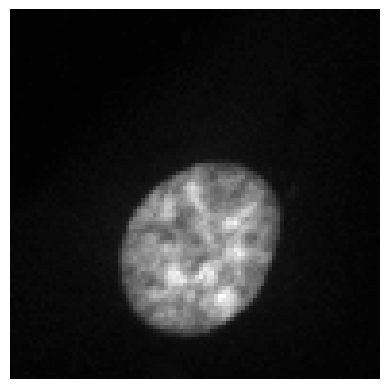

In [ ]:
file_path = './data_examples/0450_1.hdf5'
dataset_name='clean'
patch_num=10

im , _ = hdf5_reader(dataset=dataset_name, patch=patch_num)(file_path)
plot_image(im[0])

... or enconding them in the path, where datasets are subfolders and patches the image files. The latter being compatible with [`image_reader`](https://bmandracchia.github.io/bioMONAI/io.html#image_reader) syntaxis.

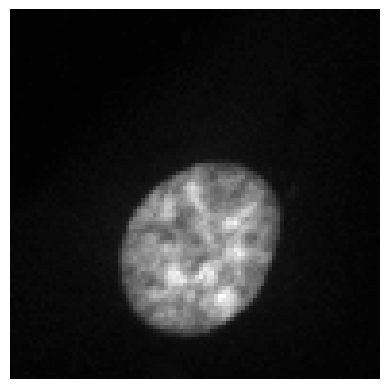

In [ ]:
f = file_path + '/' + dataset_name + '/' + '%d'%(patch_num)
im , _ = hdf5_reader()(f)
plot_image(im[0])

### Preprocessing

### Load and preprocess

In [ ]:
org_img, _, _ = _load_and_preprocess(f)

test_eq(org_img.data[0].shape, im.shape)

### Read multichannel data

In [ ]:
t = _multi_sequence([f], only_tensor=True);
test_eq(t[0].shape, im.shape)

In [ ]:
t.shape

torch.Size([1, 1, 96, 96])

### Image reader

In [8]:
#| echo: false
#| output: asis
show_doc(image_reader)

---

[source](https://github.com/bmandracchia/bioMONAI/blob/main/bioMONAI/io.py#L300){target="_blank" style="float:right; font-size:smaller"}

### image_reader

>      image_reader (file_path:(<class'str'>,<class'pathlib.Path'>,<class'fastco
>                    re.foundation.L'>,<class'list'>), dtype=<class
>                    'torch.Tensor'>, only_tensor:bool=True, **kwargs)

*Loads and preprocesses a medical image.

Args:
    file_path: Path to the image. Can be a string, Path object or a list.
    dtype: Datatype for the return value. Defaults to torchTensor.
    reorder: Whether to reorder the data to be closest to canonical 
        (RAS+) orientation. Defaults to False.
    resample: Whether to resample image to different voxel sizes and 
        image dimensions. Defaults to None.
    only_tensor: To return only an image tensor. Defaults to True.

Returns:
    The preprocessed image. Returns only the image tensor if 
    only_tensor is True, otherwise returns original image, 
    preprocessed image, and original size.*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| file_path | (<class 'str'>, <class 'pathlib.Path'>, <class 'fastcore.foundation.L'>, <class 'list'>) |  | Path to the image |
| dtype | _TensorMeta | Tensor | Datatype for the return value. Defaults to torchTensor |
| only_tensor | bool | True | To return only an image tensor |
| kwargs |  |  |  |

In [ ]:
test_eq(image_reader(f)[0].shape, im.shape)